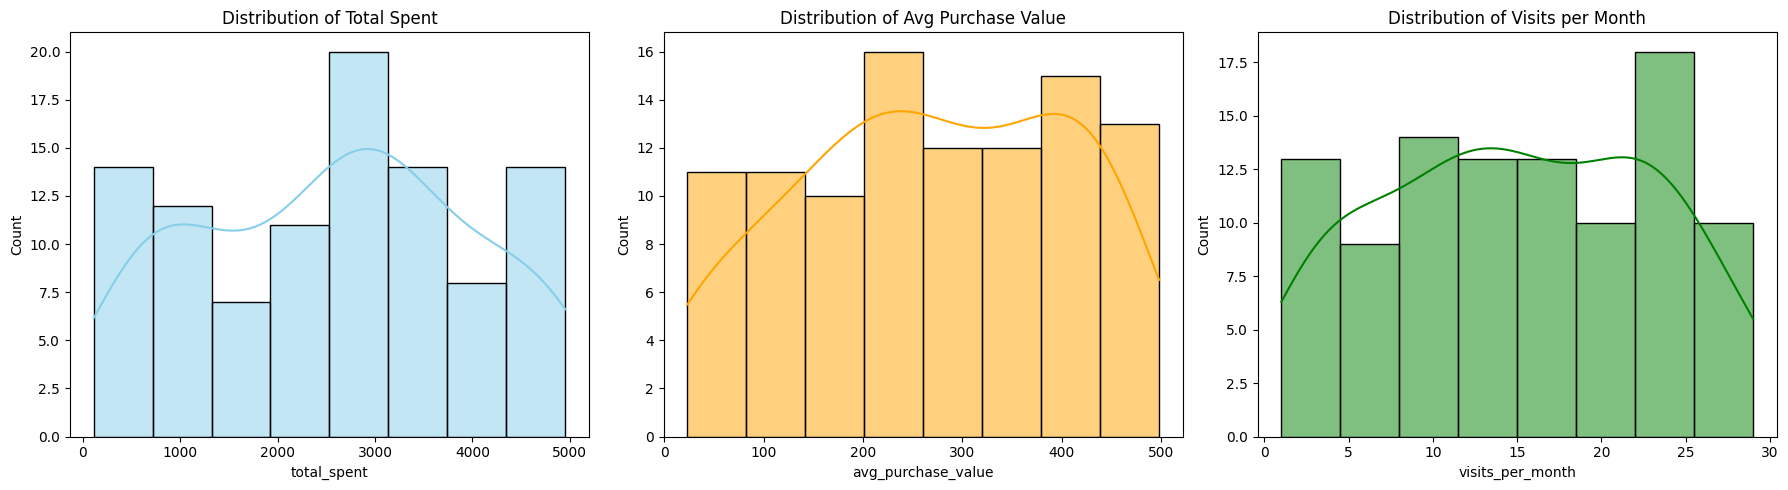

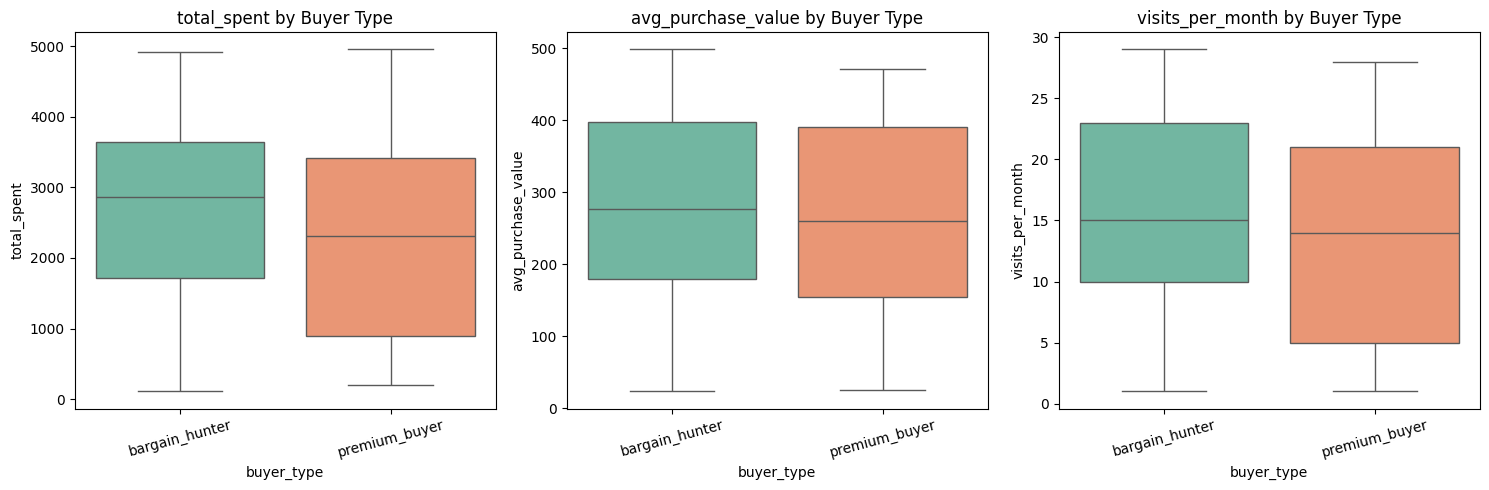

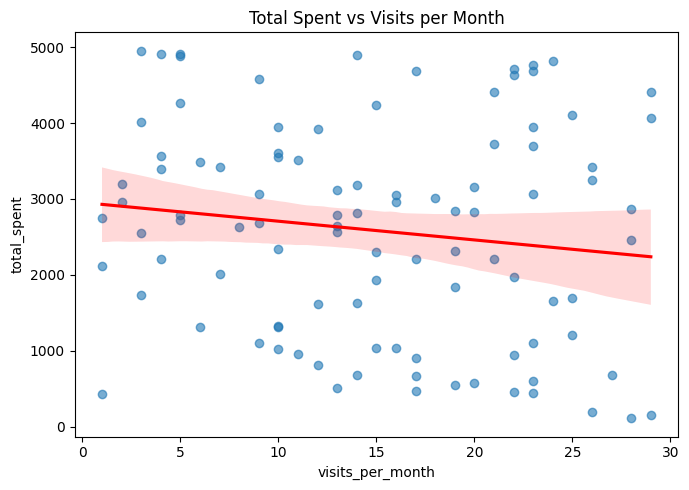

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load your dataset
df = pd.read_csv("/content/customer_behavior.csv")

# Create output directory
output_dir = "customer_behavior_analysis"
os.makedirs(output_dir, exist_ok=True)

# Summary statistics and correlation matrix
summary_stats = df.describe()
correlation_matrix = df.corr(numeric_only=True)

summary_stats.to_csv(f"{output_dir}/summary_statistics.csv")
correlation_matrix.to_csv(f"{output_dir}/correlation_matrix.csv")

# Distribution Plots
fig1, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['total_spent'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Total Spent')
sns.histplot(df['avg_purchase_value'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Avg Purchase Value')
sns.histplot(df['visits_per_month'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Visits per Month')
fig1.tight_layout()
fig1.savefig(f"{output_dir}/distribution_plots.png")

# Box Plots
fig2 = plt.figure(figsize=(15, 5))
for i, col in enumerate(['total_spent', 'avg_purchase_value', 'visits_per_month'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='buyer_type', y=col, palette='Set2',hue='buyer_type')
    plt.title(f'{col} by Buyer Type')
    plt.xticks(rotation=15)
fig2.tight_layout()
fig2.savefig(f"{output_dir}/boxplots_by_buyer_type.png")

# Scatter Plot
fig3 = plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='visits_per_month', y='total_spent', scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Total Spent vs Visits per Month")
fig3.tight_layout()
fig3.savefig(f"{output_dir}/scatter_plot_total_spent_vs_visits.png")

# Write README.md
readme_content = """
# Customer Behavior Analysis

This project analyzes a dataset containing customer behavior data, including total spending, average purchase value, visit frequency, and buyer type classification.

## Dataset Columns
- **total_spent**: Total amount of money a customer has spent.
- **avg_purchase_value**: Average value of each purchase.
- **visits_per_month**: Number of visits per month.
- **buyer_type**: Category of buyer (e.g., 'bargain_hunter', 'premium_buyer').

## Analysis Performed
1. Summary Statistics
2. Correlation Matrix
3. Visualizations:
   - Distribution Plots for all numerical variables
   - Box Plots grouped by `buyer_type`
   - Scatter Plot of Total Spent vs Visits per Month

## Outputs
- summary_statistics.csv
- correlation_matrix.csv
- distribution_plots.png
- boxplots_by_buyer_type.png
- scatter_plot_total_spent_vs_visits.png

## Requirements
- Python 3.x
- pandas
- seaborn
- matplotlib
"""

with open(os.path.join(output_dir, "README.md"), "w") as f:
    f.write(readme_content)
